In [1]:
from QuditsOnQubits import create_ame43
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

from QuditsOnQubits import create_ame43, create_graph_ghz, create_ghz
import igraph as ig

In [15]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

with open('ame43_v2.qpy', 'rb') as fd:
    ame43_v2 = qpy.load(fd)[0]

with open('ame43opti.qpy', 'rb') as fd:
    ame43opti = qpy.load(fd)[0]

with open('ame43fig12.qpy', 'rb') as fd:
    ame43fig12 = qpy.load(fd)[0]

In [3]:
operators = []

operators.append(FDAGgate)

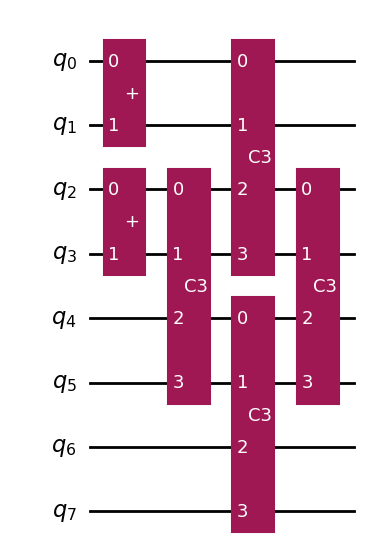

In [45]:
ame43opti.draw("mpl")

In [12]:
def exp_Ax_first_qutrit(counts):

    omega = np.exp(2j * np.pi / 3)
    phase = {"00": 0, "01": 1, "10": 2}

    shots = sum(counts.values())
    exp_val = 0 + 0j

    for bits, n in counts.items():
        p0 = bits[-2:]
        p0 = p0[::-1]
        print(p0)
        exp_val += (n / shots) * omega**phase[p0]

    return exp_val

In [4]:
final_circs = []

qutryt_badany = [0, 1]

tempcirc = ame43opti.copy()
tempcirc.append(FDAGgate, qutryt_badany)
#tempcirc.measure_all()
final_circs.append(tempcirc)

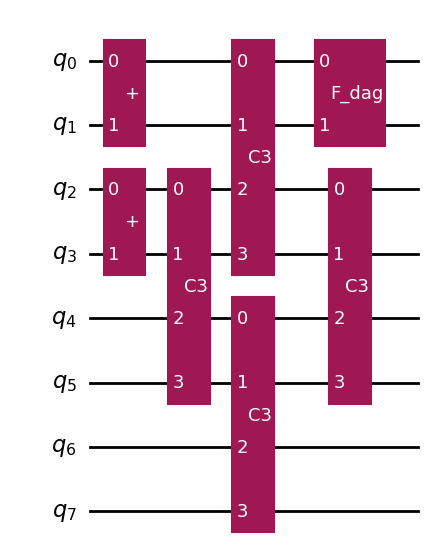

In [5]:
final_circs[0].draw("mpl")

In [48]:
sampler = StatevectorSampler(default_shots=2048)

job = sampler.run([(final_circs[0], None, 2048)])
result = job.result()[0]
counts = result.data.meas.get_counts()

C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit\primitives\statevector_sampler.py:162: UserWarning: One of your circuits has no output classical registers and so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(


AttributeError: 'DataBin' object has no attribute 'meas'

In [17]:
exp_Ax_first_qutrit(counts)

10
01
10
10
01
00
00
01
10
01
01
00
00
01
00
10
00
00
01
10
10
00
01
01
10
10
00


np.complex128(-0.021728515625000056-0.007188687433757432j)

In [20]:
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [22]:
testFdag = QuantumCircuit(2,2)
testFdag.append(FDAGgate, [0, 1])


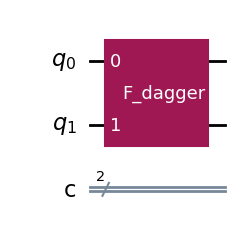

In [23]:
testFdag.draw("mpl")

In [33]:
est = StatevectorEstimator()
obs = SparsePauliOp.from_list([("XX", 1.0)])

pub_list = [(testFdag, [obs])]
job = est.run(pub_list)
res = job.result()[0]
ev = res.data.evs[0]

In [34]:
ev

np.float64(0.6666666666666664)

In [49]:
omega = np.exp(2j * np.pi / 3)
coef_Z0   = 1/4
coef_Z1   = 1/4
coef_Z0Z1 = 1/2

obs_Z3 = SparsePauliOp.from_list([
    ("ZIIIIIII", coef_Z0),
    ("IZIIIIII", coef_Z1),
    ("ZZIIIIII", coef_Z0Z1),
])

In [50]:
pub_list = [(final_circs[0], [obs_Z3])]
job = est.run(pub_list)
res = job.result()[0]
ev = res.data.evs[0]

In [51]:
ev

np.float64(-3.2751579226442118e-15)

In [52]:
bitstrings = [
    "00000000",  #  (0,0,0,0)
    "00010110",  #  (0,1,1,2)
    "00101001",  #  (0,2,2,1)
    "01000101",  #  (1,0,1,1)
    "01011000",  #  (1,1,2,0)
    "01100010",  #  (1,2,0,2)
    "10001010",  #  (2,0,2,2)
    "10010001",  #  (2,1,0,1)
    "10100100",  #  (2,2,1,0)
]

In [53]:
psi_ideal = np.zeros(2**8, dtype=complex)
for bs in bitstrings:
    index = int(bs, 2)   # zamienia binarny łańcuch na liczbę (np. "00010110" → 22)
    psi_ideal[index] = 1/3

In [61]:
mojeAme43 = Statevector(ame43_v2)

In [62]:
mojeAme43.draw("latex")

<IPython.core.display.Latex object>

In [63]:
overlap = np.vdot(psi_ideal, mojeAme43)
fidelity = np.abs(overlap)**2

In [64]:
fidelity

np.float64(0.30864197530864285)

In [65]:
import igraph as ig

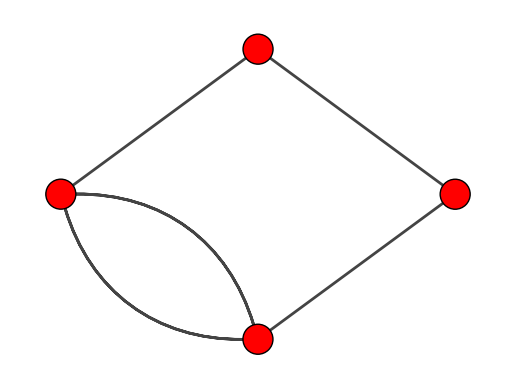

In [66]:
sq = ig.Graph()

sq.add_vertices(4)

sq.add_edges([(0, 1), (1, 2), (2, 3), (2, 3), (3, 0)])

fig, ax = plt.subplots()
ig.plot(sq, target=ax)

In [67]:
from QuditsOnQubits import create_graph_ghz

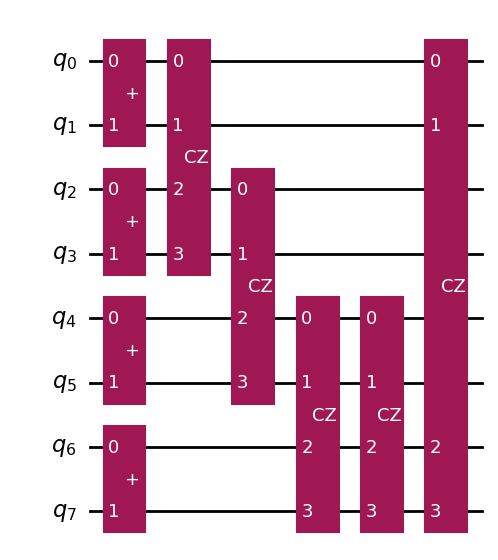

In [68]:
ame43algo = create_graph_ghz(sq)
ame43algo.draw('mpl')

In [69]:
mojeAme43 = Statevector(ame43algo)

In [71]:
mojeAme43.draw("latex")

<IPython.core.display.Latex object>

In [72]:
overlap = np.vdot(psi_ideal, mojeAme43)
fidelity = np.abs(overlap)**2

In [73]:
fidelity

np.float64(0.012345679012345607)

In [74]:
qc = QuantumCircuit(8)
qc.initialize(psi_ideal, qc.qubits)

In [104]:
from qiskit.quantum_info import partial_trace

In [110]:
partial_trace(Statevector(ame43_v2), [4, 5, 6, 7]).data.round(3)

array([[0.111+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j],
       [0.   +0.j, 0.111+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j],
       [0.   +0.j, 0.   +0.j, 0.111+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j],
       [0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j],
       [0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.111+0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
        0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0

In [111]:
partial_trace(Statevector(ame43opti), [4, 5, 6, 7]).data.round(3)

array([[ 0.111+0.j,  0.   +0.j,  0.   +0.j, -0.   -0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j, -0.   -0.j,  0.   +0.j,  0.   +0.j,
        -0.   +0.j],
       [ 0.   +0.j,  0.111+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.111+0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j],
       [-0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j, -0.   -0.j, -0.   +0.j,
        -0.   -0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.111+0.j,
         0.   +0.j,  0.   +0.j, 

In [112]:
from qiskit.quantum_info import state_fidelity

In [113]:
state_fidelity(Statevector(ame43_v2), Statevector(ame43opti))

0.012345679012345382

In [6]:
def C3_adder():
    circ = QuantumCircuit(4)

    circ.cx(1,2)
    circ.ccx(1,2,3)
    circ.ccx(1,3,2)
    circ.cx(0,3)
    circ.ccx(0,3,2)
    circ.ccx(0,2,3)
    circ.cz(1,2)
    circ.cz(0,3)

    circ.name = "C3"
    return circ

C3 = C3_adder()

ame43circ = QuantumCircuit(8)
ame43circ.append(Fgate, [4,5])
ame43circ.append(Fgate, [6,7])
ame43circ.append(C3, [7, 6, 3, 2])
ame43circ.append(C3, [7, 6, 1, 0])
ame43circ.append(C3, [5, 4, 3, 2])
ame43circ.append(C3, [5, 4, 1, 0])
ame43circ.append(C3, [5, 4, 1, 0])

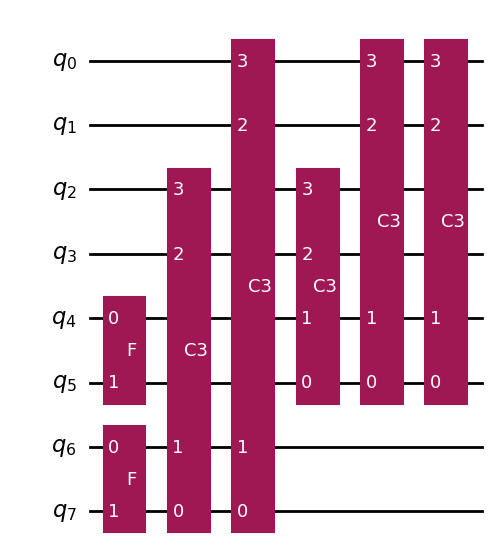

In [7]:
ame43circ.draw('mpl')

In [8]:
Statevector(ame43circ).draw('latex')

<IPython.core.display.Latex object>

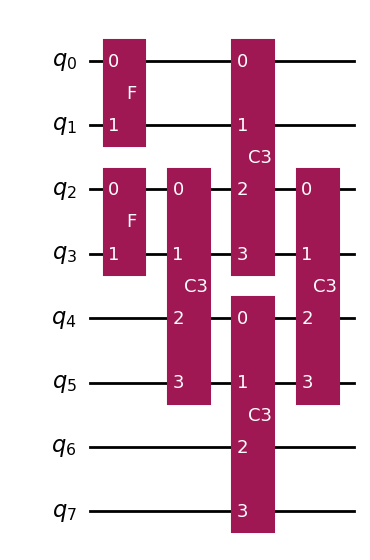

In [9]:
ame43circ_v2 = QuantumCircuit(8)
ame43circ_v2.append(Fgate, [0,1])
ame43circ_v2.append(Fgate, [2,3])
ame43circ_v2.append(C3, [2, 3, 4, 5])
ame43circ_v2.append(C3, [0, 1, 2, 3])
ame43circ_v2.append(C3, [4, 5, 6, 7])
ame43circ_v2.append(C3, [2, 3, 4, 5])
ame43circ_v2.draw('mpl')

In [10]:
Statevector(ame43circ_v2).draw('latex')

<IPython.core.display.Latex object>

In [16]:
Statevector(ame43fig12).draw("latex")

<IPython.core.display.Latex object>